## Shortage EDA analysis

In [34]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
# import xlrd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# from prophet import Prophet


In [35]:
# Load updated shorage database
df = pd.read_csv("Shortage data/shortage_final.csv")

# converting headers in lowercase
df.columns = df.columns.str.lower()

# replacing spaces for "_" in headers
df.columns = df.columns.str.replace(' ', '_')

# converting drugsname in lowercase
df['common_or_proper_name'] = df['common_or_proper_name'].str.lower()

# Removing NaN actual_start_date and actual_end_date, considering as an incomplete record
df=df.dropna(subset=['actual_start_date','actual_end_date'] )

# Removing Actuals before 2017
df = df.loc[(df['actual_start_date'] >= '2017-01-01')]
# Removing outliers before 2017 for End_date
df = df.loc[(df['actual_end_date'] >= '2017-01-01')]

# Removing duplicates ID Reports
df=df.drop_duplicates("report_id", keep=False)

# Removing Avoided shortages (outliers for our analysis)
df = df[df['shortage_status']!="Avoided shortage"]

# converting into datatime critical field
df['actual_start_date'] = df['actual_start_date'].astype('datetime64[D]')
df['actual_end_date'] = df['actual_end_date'].astype('datetime64[D]')

# Fill null DIN with zero, convering into integer
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')


# calculating # of days of shortages
df['Days']= df['actual_end_date']-df['actual_start_date']

# Create clear field number of days as integer
df['Days2'] = df['Days'].dt.days
df['Days2']=df['Days2'].astype('int')

# Removing negative days
df= df[(df['Days2']>=0)]
df.Days2.min()

df.shape

(13476, 24)

In [36]:
print ("Unique values:  \n",df.nunique())

Unique values:  
 report_id                     13476
drug_identification_number     5475
report_type                       1
brand_name                     3438
company_name                    196
common_or_proper_name          4165
ingredients                    1174
strength(s)                     871
packaging_size                 2424
route_of_administration         177
shortage_status                   2
dosage_form(s)                  121
atc_code                        463
atc_description                 201
anticipated_start_date         1257
actual_start_date              1706
estimated_end_date             1602
actual_end_date                1677
reason                            7
date_created                   1518
date_updated                   1802
tier_3                            2
Days                            817
Days2                           817
dtype: int64


<AxesSubplot:title={'center':'Count of shortage status'}, xlabel='count', ylabel='shortage_status'>

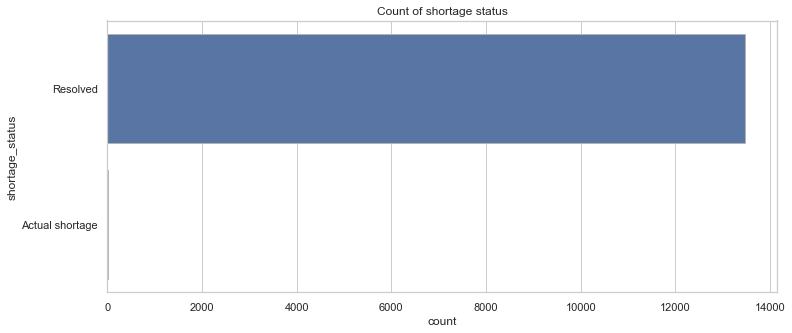

In [53]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid")
plt.title("Count of shortage status");

# sequential_colors = sns.color_palette("Blues",7)
# plt.xticks(rotation=90)
sns.countplot(y=df['shortage_status'],  edgecolor=".7")

Show proportional Resolved/Actual cases, and outliers by # of days

<AxesSubplot:xlabel='shortage_status', ylabel='Days2'>

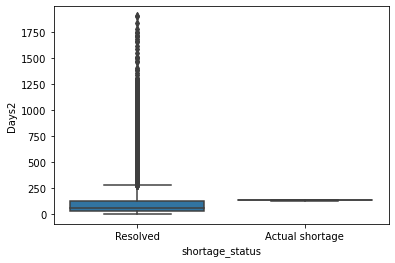

In [37]:
sns.boxplot(data = df,
                x =df['shortage_status'],
                y = df['Days2'])

<AxesSubplot:title={'center':'Count of shortage reason'}, xlabel='count', ylabel='reason'>

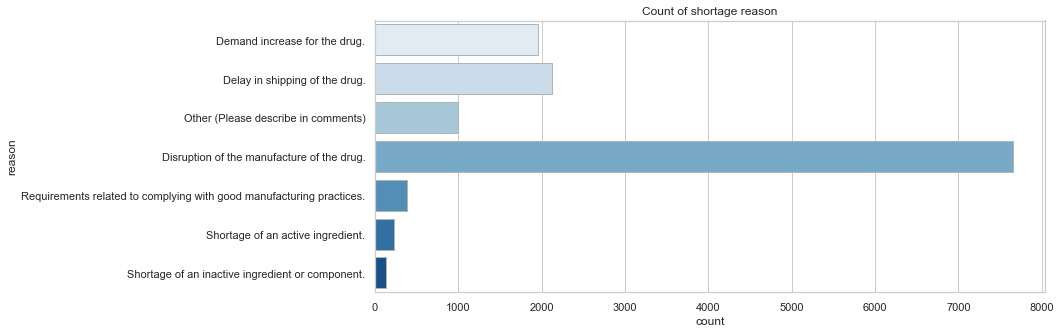

In [48]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid")
plt.title("Count of shortage reason");

sequential_colors = sns.color_palette("Blues",7)
# plt.xticks(rotation=90)
sns.countplot(y=df['reason'], palette=sequential_colors, edgecolor=".7")

<AxesSubplot:xlabel='Days2', ylabel='reason'>

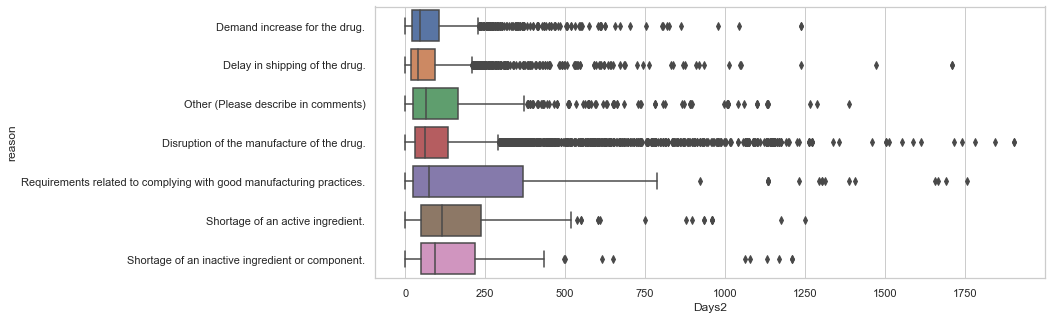

In [49]:
sns.boxplot(data = df,
                y =df['reason'],
                x = df['Days2'])

Histogram of # of days of shortage

array([[<AxesSubplot:title={'center':'Days2'}>]], dtype=object)

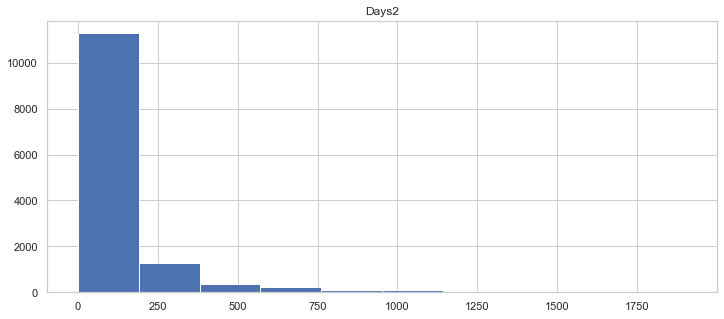

In [54]:
df.hist(column='Days2')

Distribution over the period

<AxesSubplot:xlabel='actual_start_date', ylabel='Days2'>

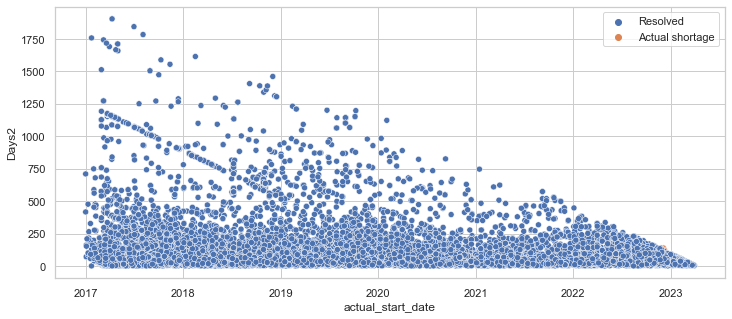

In [55]:
# Create a scatter plot of time and # of Days
sns.scatterplot(data = df, x =df['actual_start_date'],
                               y = df['Days2'],
                               hue=df.shortage_status.tolist())

In [56]:
df.Days2.max()

1904

In [57]:
# Get Date into months and years
df['Date'] = df.index
df['Year'] = df['actual_start_date'].dt.year
df['Month'] = df['actual_start_date'].dt.month

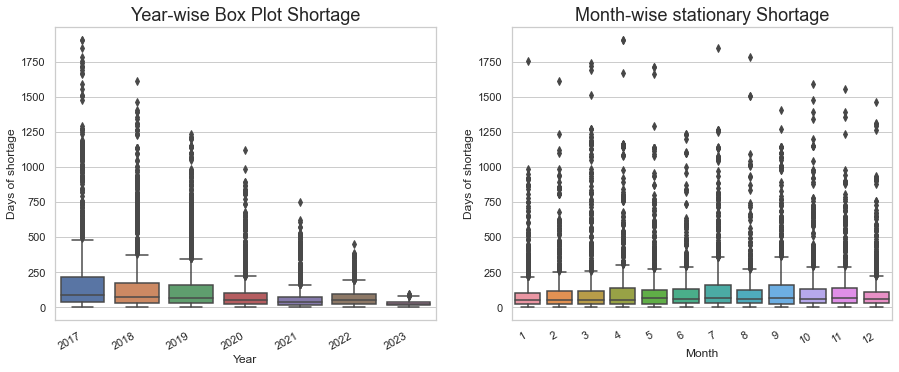

In [58]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
					figsize=(15, 6))

# Using Seaborn Library for Box Plot
sns.boxplot(df['Year'],
			df["Days2"], ax=ax[0])

# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot Shortage',
				fontsize=18, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Days of shortage')

# Using Seaborn Library for Box Plot
sns.boxplot(df['Month'],
			df["Days2"], ax=ax[1])

# Defining the title and axes names
ax[1].set_title('Month-wise stationary Shortage',
				fontsize=18, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Days of shortage')

# rotate the ticks and right align them
fig.autofmt_xdate()
